## Bài 2: Biến ngẫu nhiên và Phân bố xác suất
---
Họ và tên: Nguyễn Xuân Hoàng


## I. Lý thuyết

In [2]:
import numpy as np 
print('numpy version: ', np.__version__)

numpy version:  1.21.5


 ### Hàm trọng số PMF (Probability Mass Function)

In [23]:
#Tạo ra ngẫu nhiên 100 con điểm nhận giá trị từ 0 đến 10
diem = np.random.randint(0,11, size = 100)
bien_ngau_nhien, tan_so = np.unique(diem, return_counts = True)
pmf = tan_so / len(diem)
#Bảng phân phối xác suất
np.column_stack( ( bien_ngau_nhien, pmf ))

array([[ 0.  ,  0.07],
       [ 1.  ,  0.09],
       [ 2.  ,  0.12],
       [ 3.  ,  0.07],
       [ 4.  ,  0.08],
       [ 5.  ,  0.1 ],
       [ 6.  ,  0.1 ],
       [ 7.  ,  0.09],
       [ 8.  ,  0.07],
       [ 9.  ,  0.12],
       [10.  ,  0.09]])

C:\Users\hoangnx8\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


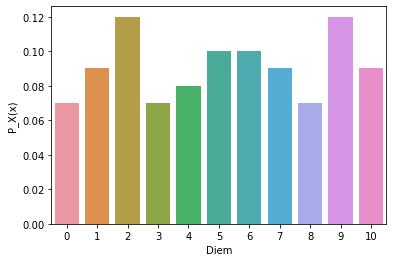

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
PMF = sns.barplot(bien_ngau_nhien, pmf)
PMF.set(xlabel = 'Diem', ylabel = 'P_X(x)')
plt.show()

### Hàm phân phối xác xuất (Cumulative Distribution Function)

C:\Users\hoangnx8\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


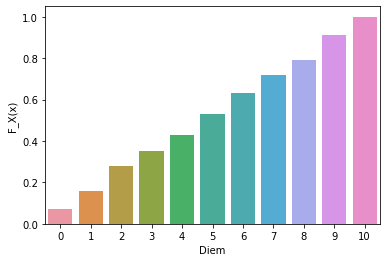

In [32]:
accumulator = 0
cdf = []
for i in pmf:
    accumulator += i
    cdf.append(accumulator)
CDF = sns.barplot(bien_ngau_nhien, cdf)
CDF.set(xlabel = 'Diem', ylabel = 'F_X(x)')
plt.show()

In [33]:
#Xác suất >= 4
1 - cdf[3]

0.6499999999999999

In [34]:
#Xác suất điểm giỏi >=8
1- cdf[7]


0.28

In [ ]:
#Xác suất điểm trung bình <5<=7 
cdf[7] - cdf[5]

###  Hàm mật độ PDF

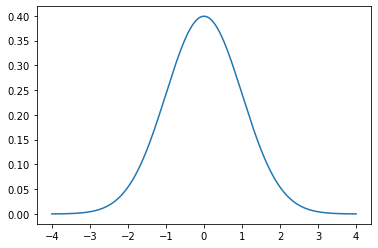

In [38]:
from scipy.stats import norm
x = np.arange(-4,4,0.001)
plt.plot(x, norm.pdf(x))
plt.show()

In [39]:
#Xac suat tai lan can diem 1.5
norm.pdf(1.5)

0.12951759566589174

In [40]:
#Xac suat tu 1 den 1.5: F(1.5)-F(1)
norm.cdf(1.5)-norm.cdf(1)

0.09184805266259899

In [42]:
#Tinh xac suat theo ham mat do
import scipy.integrate as integrate

result = integrate.quad(lambda x: norm.pdf(x), 1, 1.5)
result[0]

0.09184805266259899

In [45]:
#Tinh xac suat tu 0 den vo cung
rs1 = integrate.quad(lambda x: norm.pdf(x), 0, np.inf)
rs1[0]

0.4999999999999999

#### Ví dụ biến ngẫu nhiên sản phẩm PMF

C:\Users\hoangnx8\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


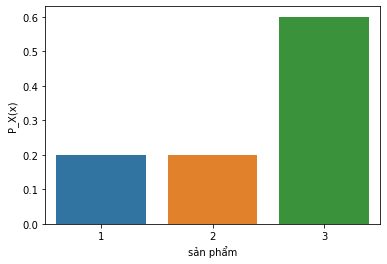

In [49]:
#pmf của một số biến ngẫu nhiên số lượng sản phẩm
san_pham = np.arange(1,4)
pmf = [0.2, 0.2, 0.6]
PMF = sns.barplot(san_pham, pmf)
PMF.set(xlabel = 'sản phẩm', ylabel ='P_X(x)')
plt.show()

C:\Users\hoangnx8\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


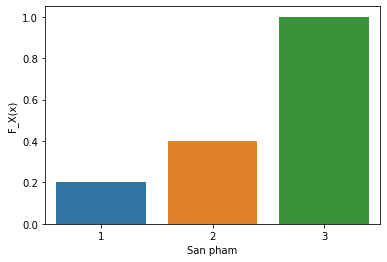

In [50]:
#CDF của biến ngẫu nhiên số lượng sản phẩm 
cdf = np.cumsum(pmf)
CDF=sns.barplot(san_pham, cdf)
CDF.set(xlabel ='San pham', ylabel = 'F_X(x)')
plt.show()

C:\Users\hoangnx8\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


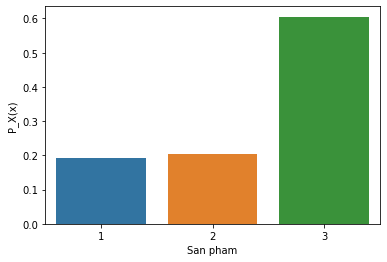

C:\Users\hoangnx8\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


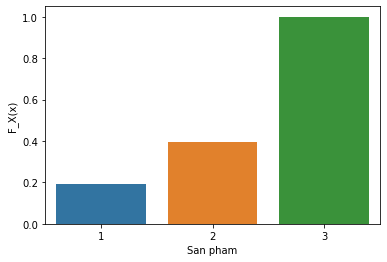

In [55]:
#Mo phong lai mot bien ngau nhien so luong san pham
from random import choices 
solan = 10000
X = choices(san_pham, pmf, k = solan)
bien_ngau_nhien, tan_so = np.unique(X, return_counts = True)
pmf = tan_so/len(X)
np.column_stack((bien_ngau_nhien, pmf))
#ham trong so pmf
PMF = sns.barplot(bien_ngau_nhien, pmf)
PMF.set(xlabel = 'San pham', ylabel = 'P_X(x)')
plt.show()
#ham tich luy cdf
cdf = np.cumsum(pmf)
CDF = sns.barplot(san_pham, cdf)
CDF.set(xlabel = 'San pham', ylabel = 'F_X(x)')
plt.show()

In [56]:
print('Ky vong: ', np.mean(X))
print('Phuong sai: ', np.var(X))
print('Do lech chuan: ', np.std(X))
print('Gia tri nho nhat: ', np.min(X))
print('Gia tri lon nhan: ', np.max(X))
print('Phan vi 0.25: ', np.quantile(X,0.25))

Ky vong:  2.4138
Phuong sai:  0.6251695600000001
Do lech chuan:  0.7906766469297042
Gia tri nho nhat:  1
Gia tri lon nhan:  3
Phan vi 0.25:  2.0


## II. BÀI TẬP THỰC HÀNH 

### Bài tập thực hành 2.1:

1. Cho biến ngẫu nhiên X nhận các giá trị [10,20,100,1000] với pmf
cho trước [0.4,0.3,0.2,0.1]
2. Vẽ đồ thị PMF, vẽ đồ thị hàm CDF
3. Tìm xác suất để biến ngẫu nhiên nhận giá trị nhở hơn 50
4. Tìm giá trị trung bình, phương sai, độ lệch tiêu chuẩn, trung vị, skewness



C:\Users\hoangnx8\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


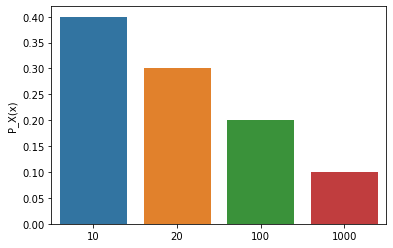

C:\Users\hoangnx8\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


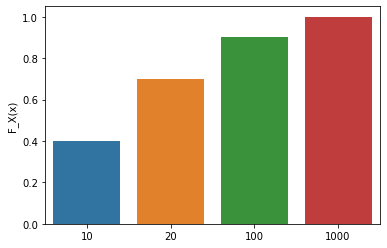

In [59]:
X = [10, 20, 100, 1000]
pmf = [0.4, 0.3, 0.2,0.1]

PMF = sns.barplot(X, pmf)
PMF.set(ylabel = 'P_X(x)')
plt.show()

cdf = np.cumsum(pmf)
CDF = sns.barplot(X, cdf)
CDF.set(ylabel = 'F_X(x)')
plt.show()

In [60]:
print('Xác suất để biến ngẫu nhiên X nhận giá trị nhỏ hơn 50 là:', cdf[1])

Xác suất để biến ngẫu nhiên X nhận giá trị nhỏ hơn 50 là: 0.7


In [61]:
from scipy.stats import skew
print('Ky vong: ', np.mean(X))
print('Phuong sai: ', np.var(X))
print('Do lech chuan: ', np.std(X))
print('Trung vị ', np.quantile(X,0.5))
print('Skewness:', skew(X))

Ky vong:  282.5
Phuong sai:  172818.75
Do lech chuan:  415.7147459496716
Trung vị  60.0
Skewness: 1.130837400820944


###  Bài tập thực hành 2.2:
1. Lấy lại dữ liệu về hoa diên vỹ ở buổi 1, có y là vec tơ nhận các giá trị loài hoa
2. Tìm bảng trọng số của y, y_train, y_test
3. Vẽ đồ thị hàm trọng số PMF của của y, y_train, y_test
4. Vẽ đồ thị hàm phân phối xác suất CDF của y, y_train, y_test



In [62]:
from sklearn import datasets 
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [64]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [69]:
bnn, freq_y = np.unique(y, return_counts = True )
pmf_y = freq_y/len(y)
np.column_stack((bnn, pmf_y))

array([[0.        , 0.33333333],
       [1.        , 0.33333333],
       [2.        , 0.33333333]])

In [71]:
bnn, freq_y_train = np.unique(y_train, return_counts = True )
pmf_y_train = freq_y_train/len(y_train)
np.column_stack((bnn, pmf_y_train))

array([[0.        , 0.32380952],
       [1.        , 0.32380952],
       [2.        , 0.35238095]])

In [72]:
bnn, freq_y_test = np.unique(y_test, return_counts = True )
pmf_y_test = freq_y_test/len(y_test)
np.column_stack((bnn, pmf_y_test))

array([[0.        , 0.35555556],
       [1.        , 0.35555556],
       [2.        , 0.28888889]])

C:\Users\hoangnx8\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


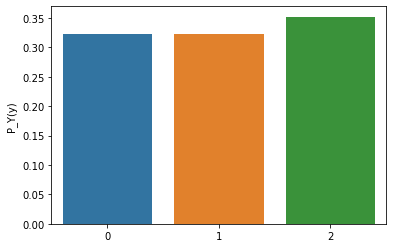

C:\Users\hoangnx8\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


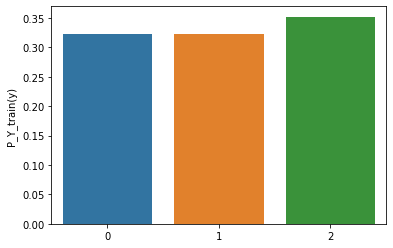

C:\Users\hoangnx8\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


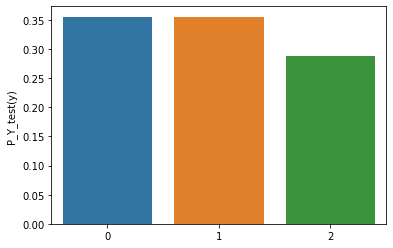

In [74]:
PMF = sns.barplot(bnn, pmf_y)
PMF.set(ylabel = 'P_Y(y) ')
plt.show()
#-------------
PMF = sns.barplot(bnn, pmf_y_train)
PMF.set(ylabel = 'P_Y_train(y) ')
plt.show()
#-------------------
PMF = sns.barplot(bnn, pmf_y_test)
PMF.set(ylabel = 'P_Y_test(y) ')
plt.show()

C:\Users\hoangnx8\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


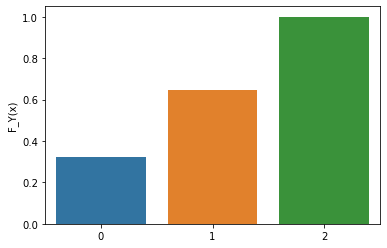

C:\Users\hoangnx8\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


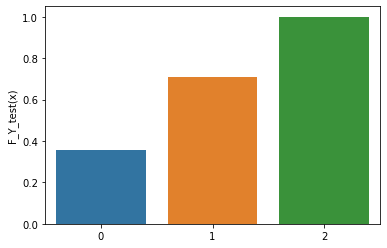

C:\Users\hoangnx8\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


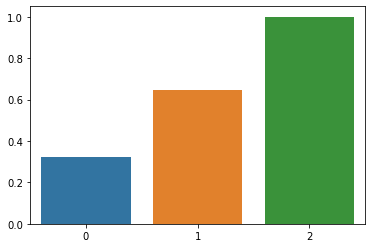

In [76]:
cdf_y = np.cumsum(pmf_y)
CDF_y = sns.barplot(bnn, cdf_y)
CDF_y.set(ylabel = 'F_Y(x)')
plt.show()
#--------------------------
cdf_y_test = np.cumsum(pmf_y_test)
CDF_y_test = sns.barplot(bnn, cdf_y_test)
CDF_y_test.set(ylabel = 'F_Y_test(x)')
plt.show()
#----------------------
cdf_y_train = np.cumsum(pmf_y_train)
CDF_y_train = sns.barplot(bnn, cdf_y_train)
CDF_y_test.set(ylabel = 'F_Y_train(x)')
plt.show()